 ### 1. Importing required packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import os

### 2. Reading the training data

In [4]:
bikes_df = pd.read_csv("day.csv")
display(pd.read_csv("day.csv"))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [5]:
bikes_df.shape

(730, 16)

In [6]:
display(bikes_df.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
display(bikes_df.head(10))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


### 3. Renaming columns for better interpretation

In [8]:
bikes_df.rename(columns={
    'instant':'rec_id',
    "dteday":"datetime",
    "yr":"year",
    "mnth":"month",
    "weathersit":"weather_condition",
    "hum":"humidity",
    "cnt":"total_count"
},inplace=True)

In [9]:
display(bikes_df.head(5))

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
display(bikes_df.tail(5))

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


### 4. Typecasting the datetime and numerical attributes to category

In [11]:
bikes_df['datetime'] = bikes_df.datetime.astype('category')
bikes_df['season'] = bikes_df.season.astype('category')
bikes_df['year'] = bikes_df.year.astype('category')
bikes_df['month'] = bikes_df.month.astype('category')
bikes_df['holiday'] = bikes_df.holiday.astype('category')
bikes_df['weekday'] = bikes_df.weekday.astype('category')
bikes_df['workingday'] = bikes_df.workingday.astype('category')
bikes_df['weather_condition'] = bikes_df.weather_condition.astype('category')

In [12]:
display(bikes_df.describe())

,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 5. Missing value analysis

In [13]:
display(bikes_df.isnull().sum())

rec_id               0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

In [14]:
#No missing values present in training dataset

### 6. Attributes distributions and trends

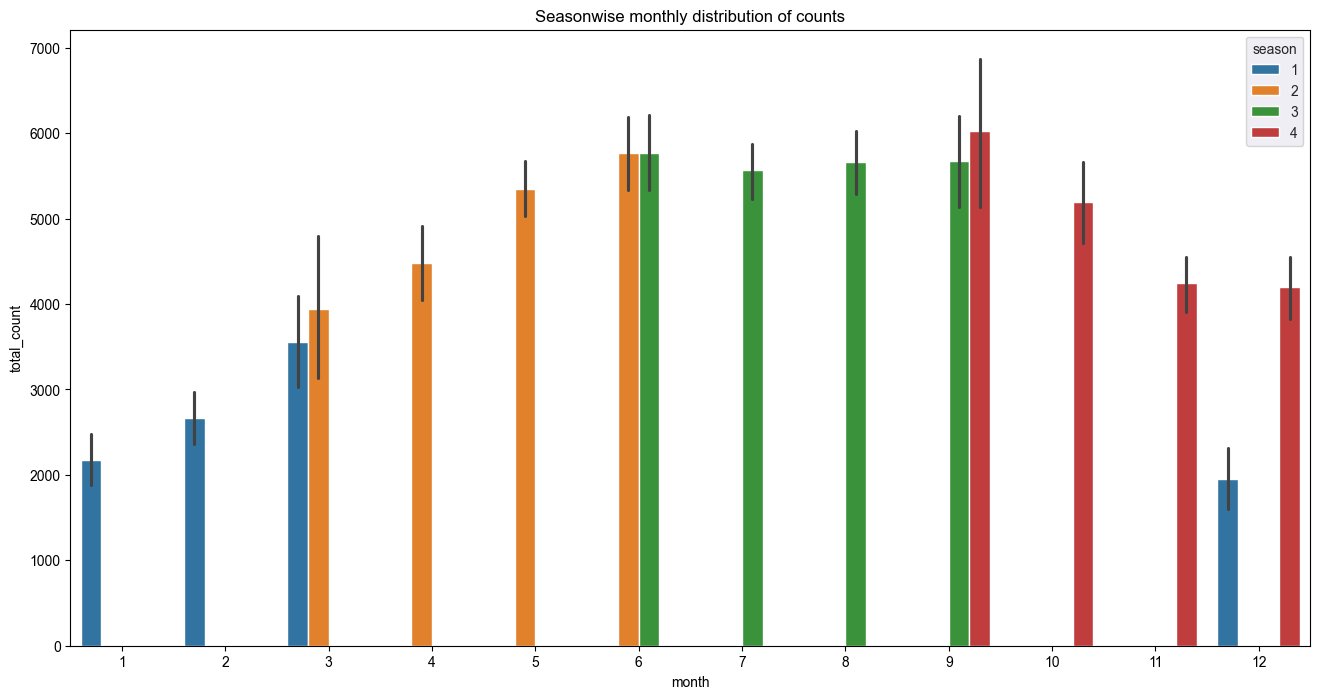

In [15]:
# MOnthly Distribution Counts
fig,ax = plt.subplots(figsize=(16,8))
sns.set_style('dark') # style must be one of white, dark, whitegrid, darkgrid, ticks

# Barplot for seasonwise monthly distribution of counts

sns.barplot(x='month',y = 'total_count',data=bikes_df[['month','total_count','season']],ax=ax, hue='season')
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()

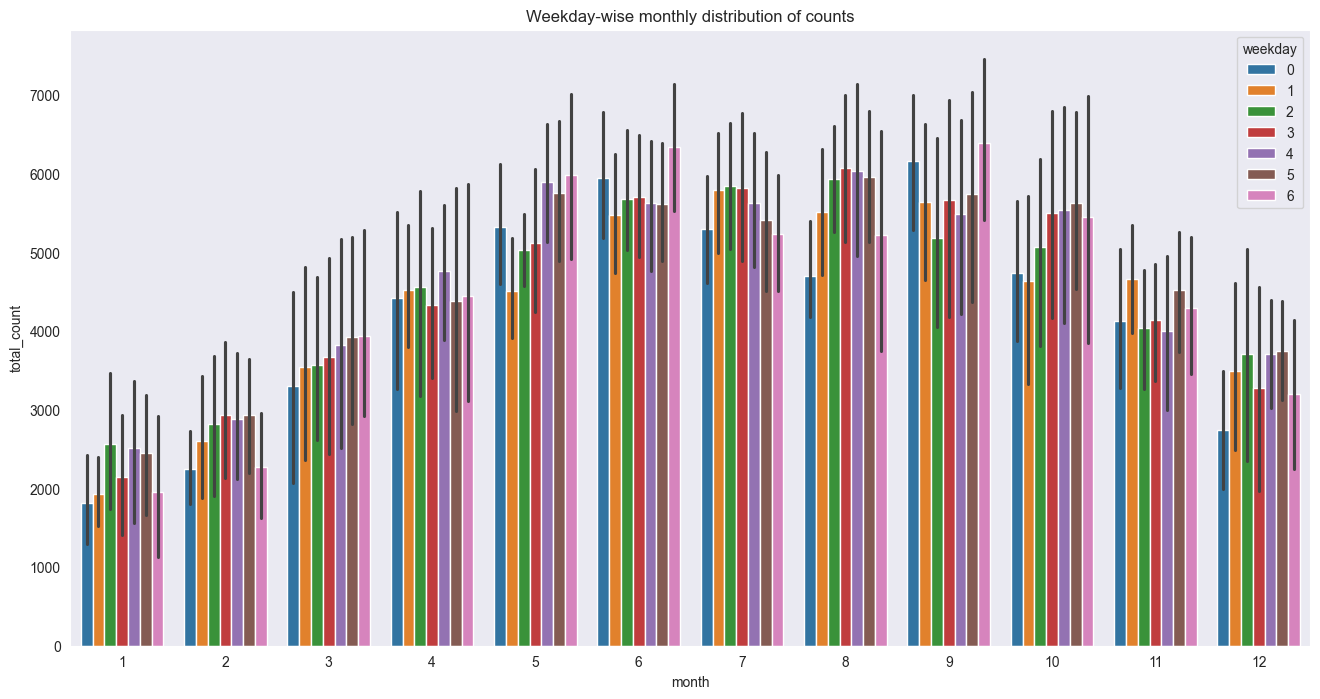

In [16]:
# Barplot for weekday-wise monthly distribution of counts

fig,ax1 = plt.subplots(figsize=(16,8))
sns.set_style('dark') 
# Barplot for seasonwise monthly distribution of counts

sns.barplot(data=bikes_df[['month','total_count','weekday']], x='month',y = 'total_count',ax=ax1, hue='weekday')
ax1.set_title('Weekday-wise monthly distribution of counts')
plt.show()

From the above plots, we can observe that there is an increase in the bike rental count in spring and summer season , and then a decrease in the bike rental count in fall and winter season.

Here,
Season 1 -> Spring
Season 2 -> Summer
Season 3 -> Fall
Season 4 -> Winter

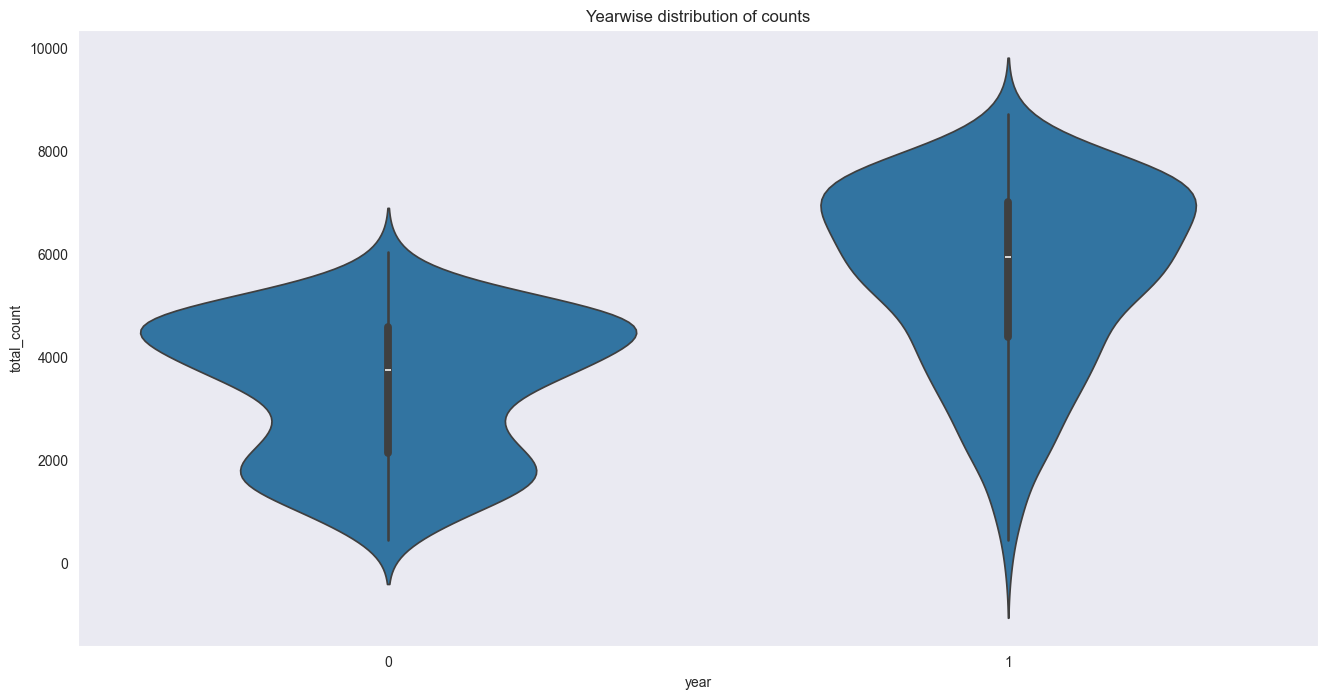

In [17]:
# Yearwise distibution of counts
fig,ax = plt.subplots(figsize=(16,8))

# Violin for yearwise distribution of counts

sns.violinplot(data=bikes_df[['year','total_count']], x='year',y = 'total_count')
ax.set_title('Yearwise distribution of counts')
plt.show()

From the violin plot, we can observe that the bike rental count distribution is higher in 2019 than in 2018.

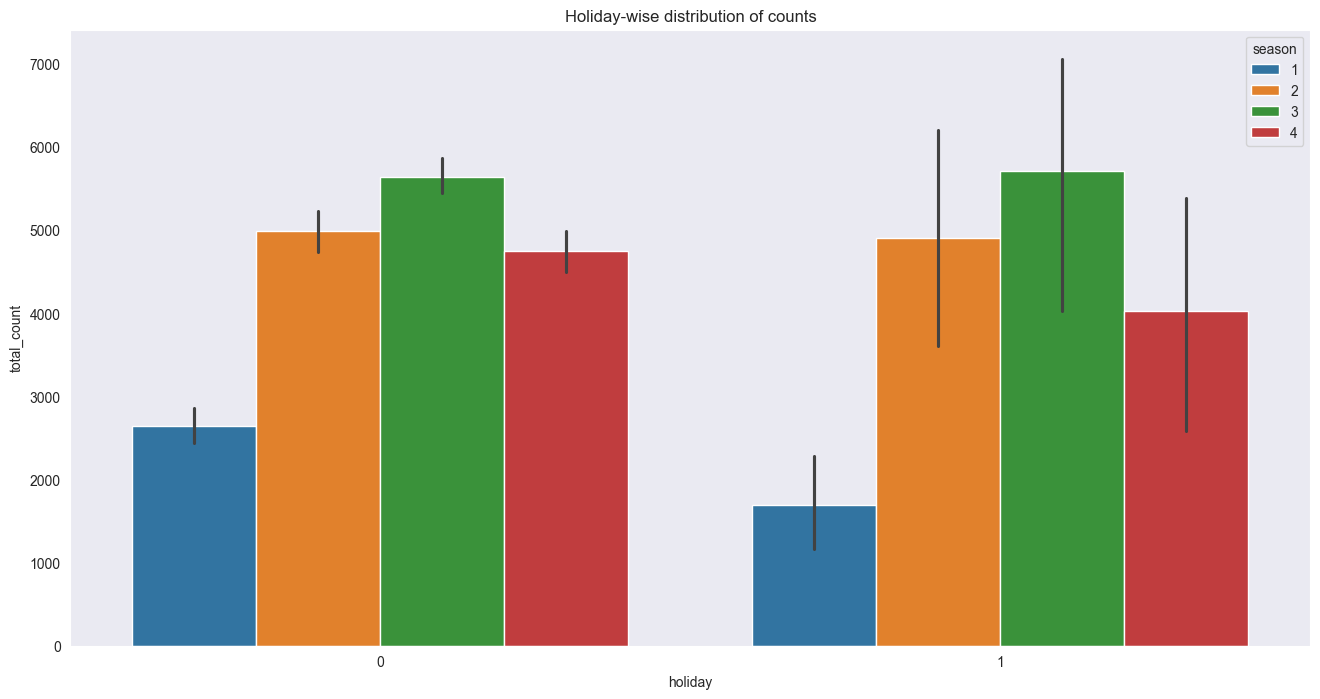

In [19]:
## Holiday wise distribution of counts

fig,ax = plt.subplots(figsize=(16,8))

# Barplot for holiday distribution of counts
sns.set_style('dark') 
sns.barplot(hue='season', data = bikes_df, x='holiday',y = 'total_count')
ax.set_title('Holiday-wise distribution of counts')
plt.show()

From the above bar plot, we can observe that during no holidays, the bike rental counts is the highest, compared to during holidays for different seasons.

Here, 0-> No holiday, 1-> Holiday


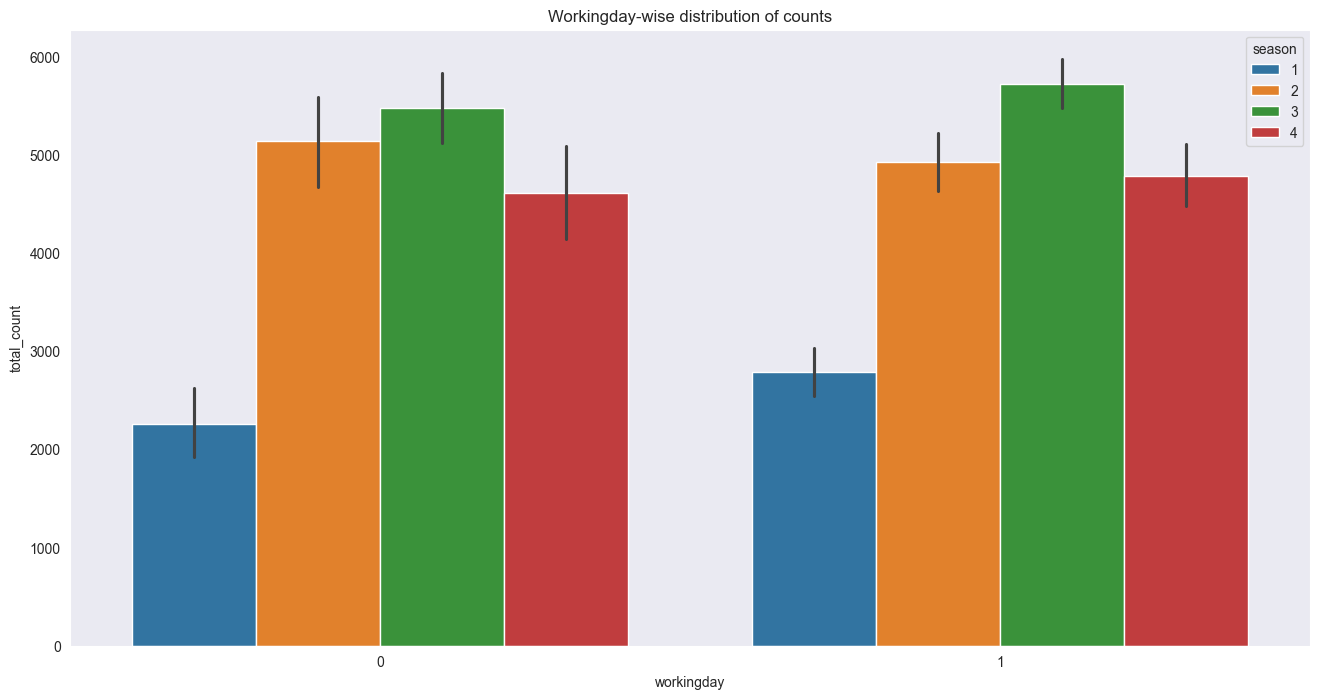

In [20]:
# Workingday-wise distribution of counts
fig,ax = plt.subplots(figsize=(16,8))

# Barplot for workingday distribution of counts
ax.set_title('Workingday-wise distribution of counts')
sns.barplot(data = bikes_df, hue='season', x='workingday',y = 'total_count')
plt.show()

From the above bar plot, we can observe that there is no significant change in bike demand with working days and non working days.

Here, 0-> No working day,
1-> Working day

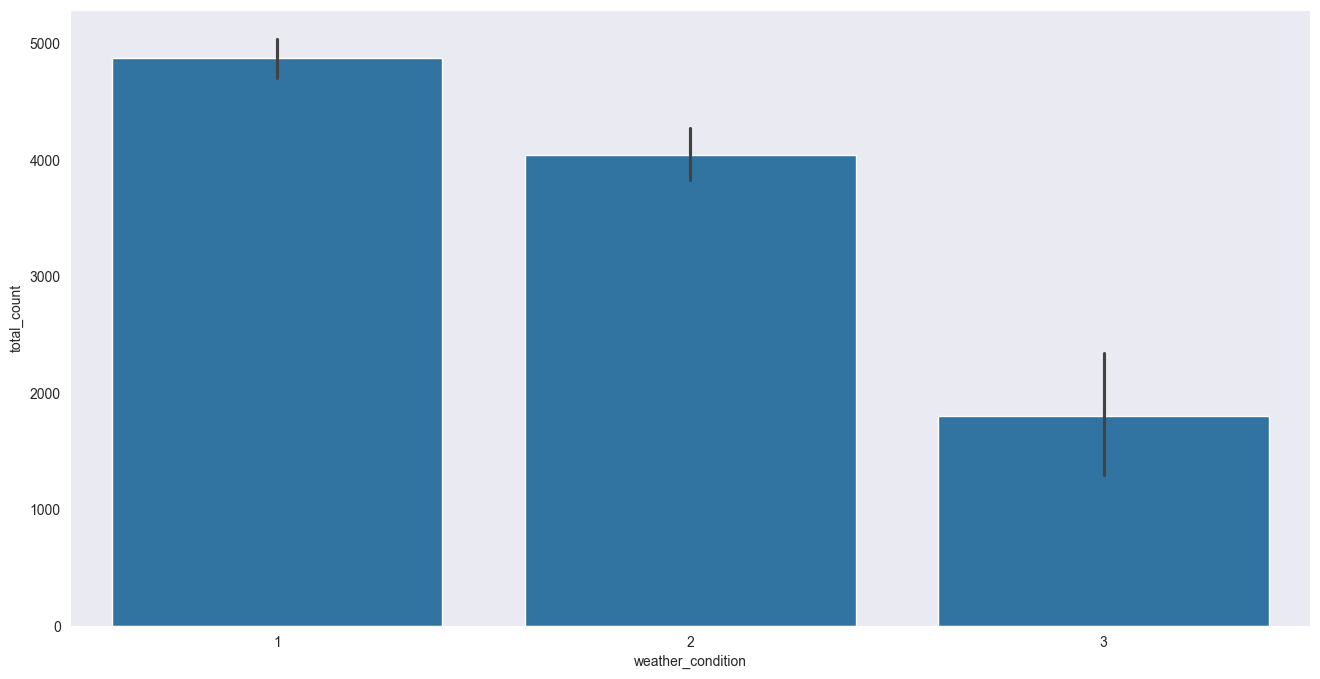

In [21]:
# Weather_condition_wise distribution of counts

fig,ax1 = plt.subplots(figsize=(16,8))

# Barplot for Weather_condition_wise distribution of counts
ax.set_title('Weather_condition_wise distribution of counts')
sns.barplot(ax=ax1, data = bikes_df[['month','total_count','weather_condition']], x='weather_condition',y = 'total_count')

plt.show()

From the above bar plot, we can observe that during clear, partly cloudy weather, the bike rental count is the highest, second-highest during misty cloudy weather, and followed by 3rd highest, during light snow and light rain weather

### 6. Outlier analysis

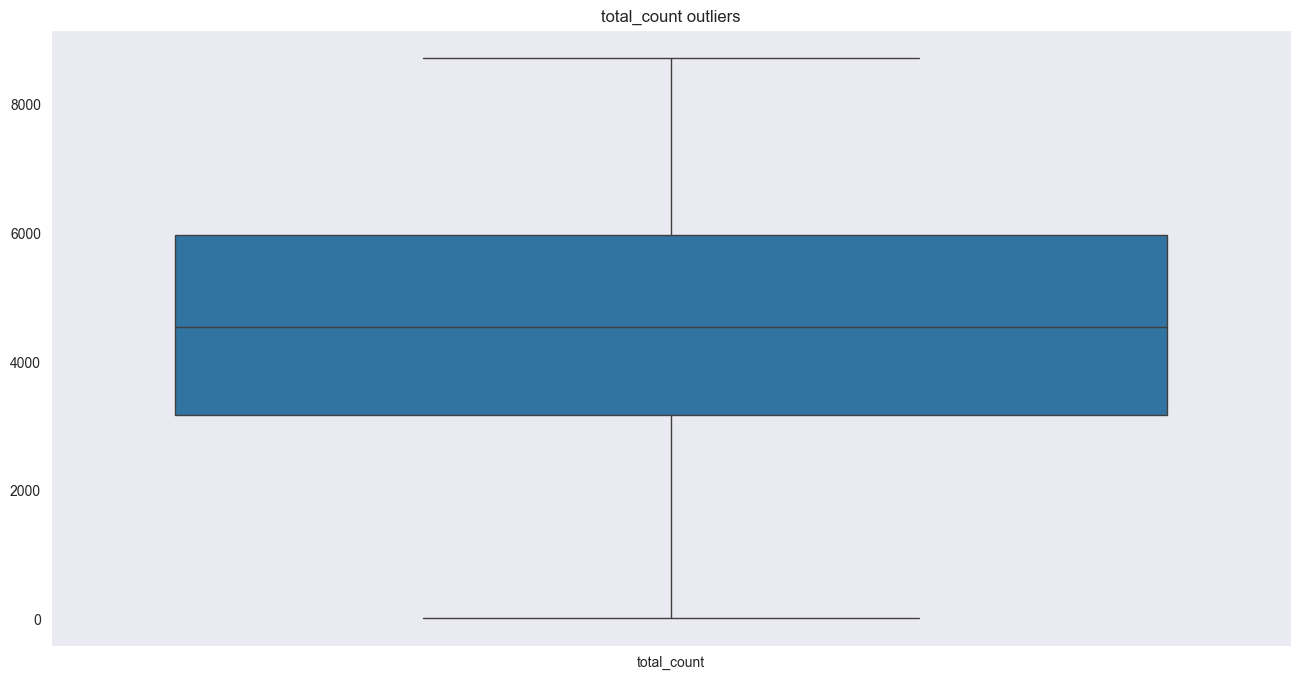

In [22]:
fig,ax=plt.subplots(figsize=(16,8))
#Boxplot for total_count outliers
ax.set_title('total_count outliers')
sns.boxplot(data=bikes_df[['total_count']])

plt.show()

From the box plot, we can observe that no outliers are present in total_count variable.

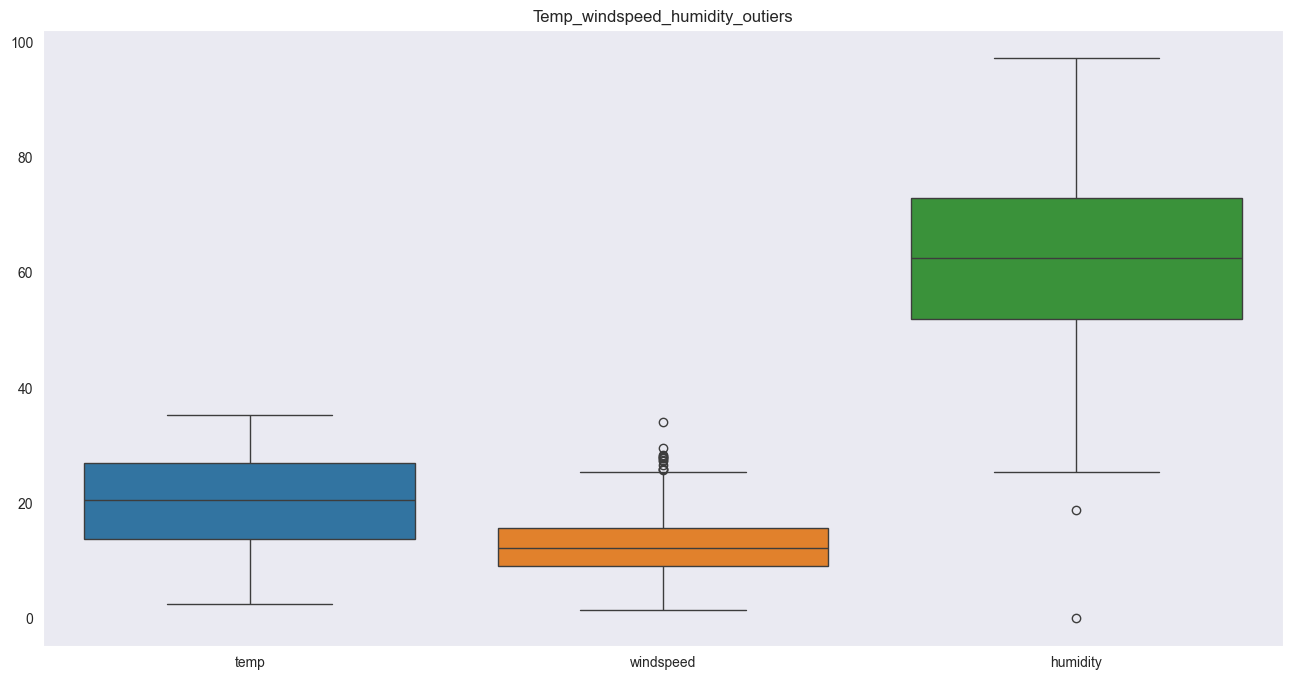

In [23]:
fig,ax=plt.subplots(figsize=(16,8))
#Box plot for Temp_windspeed_humidity_outliers
ax.set_title('Temp_windspeed_humidity_outiers')
sns.boxplot(data=bikes_df[['temp','windspeed','humidity']])

plt.show()

### 6.1 Replace and impute the outliers

In [24]:
#create dataframe for outliers
wind_hum=pd.DataFrame(bikes_df,columns=['windspeed','humidity'])
 #Cnames for outliers                     
cnames=['windspeed','humidity']       
                      
for i in cnames:
    q75,q25=np.percentile(wind_hum.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    max=q75+(iqr*1.5) #outer fence
    min=q25-(iqr*1.5) #inner fence
    wind_hum.loc[wind_hum.loc[:,i]<min,:i]=np.nan  #Replace with NA
    wind_hum.loc[wind_hum.loc[:,i]>max,:i]=np.nan  #Replace with NA
#Imputating the outliers by mean Imputation
wind_hum['humidity']=wind_hum['humidity'].fillna(wind_hum['humidity'].mean())
wind_hum['windspeed']=wind_hum['windspeed'].fillna(wind_hum['windspeed'].mean())

### 6.2 Replace the original dataset to imputated data

In [25]:
#Replacing the imputated humidity
bikes_df['humidity']=bikes_df['humidity'].replace(wind_hum['humidity'])
#Replacing the imputated windspeed
bikes_df['windspeed']=bikes_df['windspeed'].replace(wind_hum['windspeed'])
bikes_df.head(5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 7. Normal Probability Plot

Normal probability plot is a graphical technique to identify substantive departures from normality and also it tells about goodness of fit.

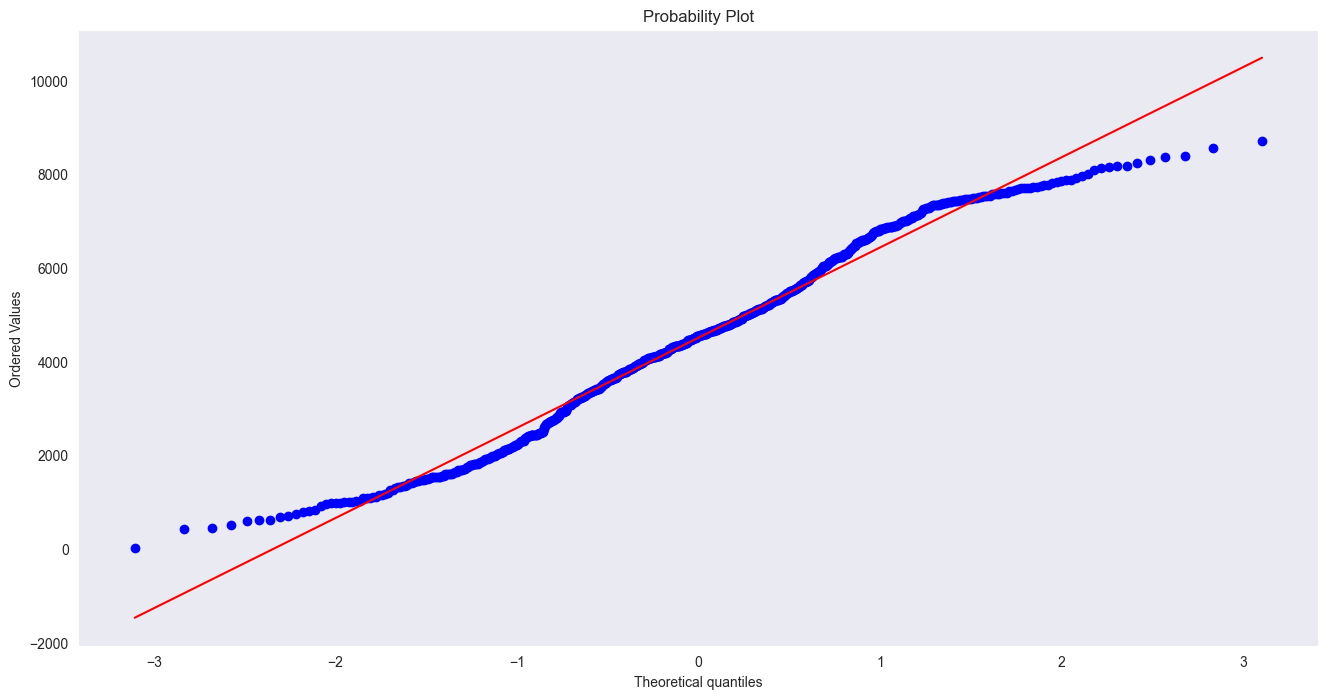

In [26]:
from scipy import stats
#Normal plot
fig=plt.figure(figsize=(16,8))
stats.probplot(bikes_df.total_count.tolist(),dist='norm',plot=plt)
plt.show()

In the above probability plot, some target variable data points are deviating from normality.

### 8. Correlation matrix
Correlation matrix tells about linear relationship between attributes and helps us to build better models.

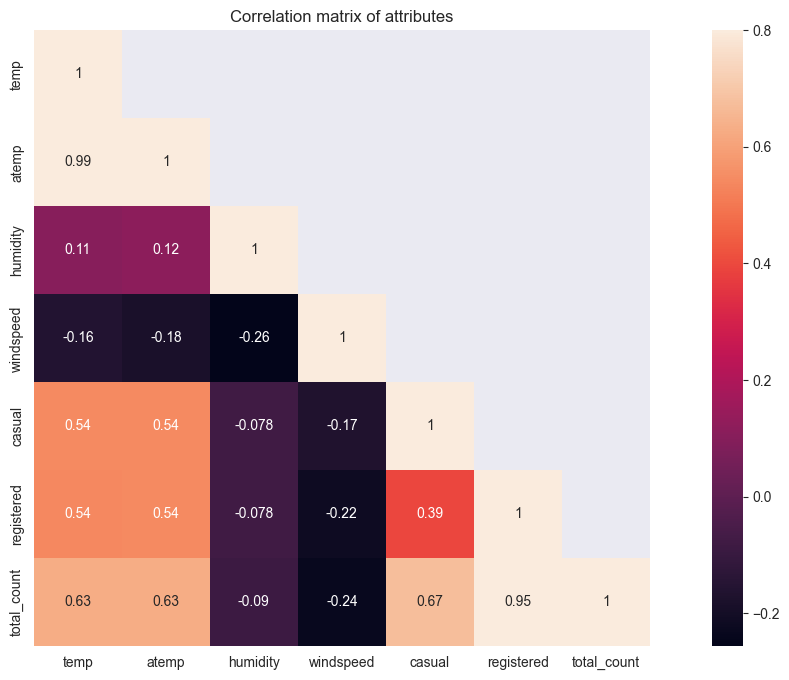

In [28]:
#Create the correlation matrix
correMtr=bikes_df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(16,8))
ax.set_title('Correlation matrix of attributes')
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)

plt.show()

From the above correlation plot, we can observe that some features are positively correlated , and some are negatively correlated to each other. The temp and atemp are highly positively correlated to each other, it means that both are carrying same information.The total_count,casual and registered are highly positively correlated to each other. So, we are going to ignore atemp,casual and registered variable for further analysis.

### 9. Modelling the dataset

In [29]:
#load the required libraries
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [30]:
#Split the dataset into the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(bikes_df.iloc[:,0:-3],bikes_df.iloc[:,-1],test_size=0.3, random_state=42)

#Reset train index values
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset train index values
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()

display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
display(y_train.head())
display(y_test.head())

(511, 14)

(219, 14)

(511, 2)

(219, 2)

,index,total_count
0,683,5445
1,645,5478
2,163,5020
3,360,1162
4,640,7572


,index,total_count
0,468,7460
1,148,4788
2,302,3331
3,355,3068
4,515,7338


In [31]:
#Create a new dataset for train attributes
train_attributes=X_train[['season','month','year','weekday','holiday','workingday','weather_condition','humidity','temp','windspeed']]
#Create a new dataset for test attributes
test_attributes=X_test[['season','month','year','weekday','holiday','workingday','humidity','temp','windspeed','weather_condition']]
#categorical attributes
cat_attributes=['season','holiday','workingday','weather_condition','year']
#numerical attributes
num_attributes=['temp','windspeed','humidity','month','weekday']

In [32]:
#To get dummy variables to encode the categorical features to numeric. 
# A dummy variable is a binary variable that takes a value of 0 or 1. 
# One adds such variables to a regression model to represent factors which are of a binary nature 
# i.e. they are either observed or not observed.

train_encoded_attributes=pd.get_dummies(train_attributes,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (511, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,11,4,62.0417,13.188347,10.250129,False,False,False,True,True,False,False,True,False,True,False,False,True
1,10,1,70.9583,15.716653,12.708493,False,False,False,True,False,True,True,False,False,True,False,False,True
2,6,1,49.4583,26.035000,20.458450,False,True,False,False,True,False,False,True,True,False,False,True,False
3,12,2,76.2500,13.325000,12.626150,True,False,False,False,True,False,False,True,False,True,False,True,False
4,10,3,79.3750,26.957500,4.458569,False,False,False,True,True,False,False,True,False,True,False,False,True


### 10. Linear Regression model

In [33]:
#Training dataset for modelling
X_train=train_encoded_attributes
y_train=y_train.total_count.values

In [34]:
#fit the trained model
lr_model=linear_model.LinearRegression()
lr_model
lr_model.fit(X_train,y_train)
lr_model

LinearRegression()

In [35]:
#Accuracy of the model
lr=lr_model.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',lr_model.coef_)
print('Model intercept value :',lr_model.intercept_)

Accuracy of the model : 0.8235146581358161
Model coefficients : [  -34.97049205    60.43458209    -8.71287554   121.73963622
   -37.09175176 -1067.52997878   220.84667408    11.86386013
   834.81944457   241.59235767  -241.59235767   -74.74603934
    74.74603934   802.85526546   297.38891277 -1100.24417823
  -991.82798863   991.82798863]
Model intercept value : 2232.8811280208615


In [36]:
#Cross validation prediction
predict=cross_val_predict(lr_model,X_train,y_train,cv=3)
predict

array([ 5127.33627997,  4228.60957556,  4358.97511059,   951.82647252,
        6738.15993482,  5192.07541405,  5611.36685645,  4061.08303567,
        3410.02275908,  5435.02694728,  2998.54995338,  4319.70818682,
        5873.19497686,  4220.77446392,  6354.9734542 ,  7379.33197622,
        3312.98456935,   758.72590423,   572.30034427,  6663.03041178,
        7159.32121163,  4060.47042157,  5665.8336118 ,  6170.65459025,
        6332.34246093,  3520.52548661,  5126.90534824,  4870.44579026,
        1655.0133012 ,  1645.21643783,  1712.0629697 ,  1232.18698491,
        4892.45046667,  6325.65821334,  5980.80389078,  1985.70727338,
        1049.51602595,  1332.99158628,  5015.69407378,  6112.63928038,
        6335.22660425,  4116.81942975,  6443.74808089,  7281.74283424,
        3404.72966034,  6330.99960979,  1391.18793197,  5357.10648469,
        4585.61000719,  4093.39292219,  3357.7276068 ,  2904.09914501,
        4746.16332281,  6777.46256957,  5969.99397983,  2331.83970277,
      

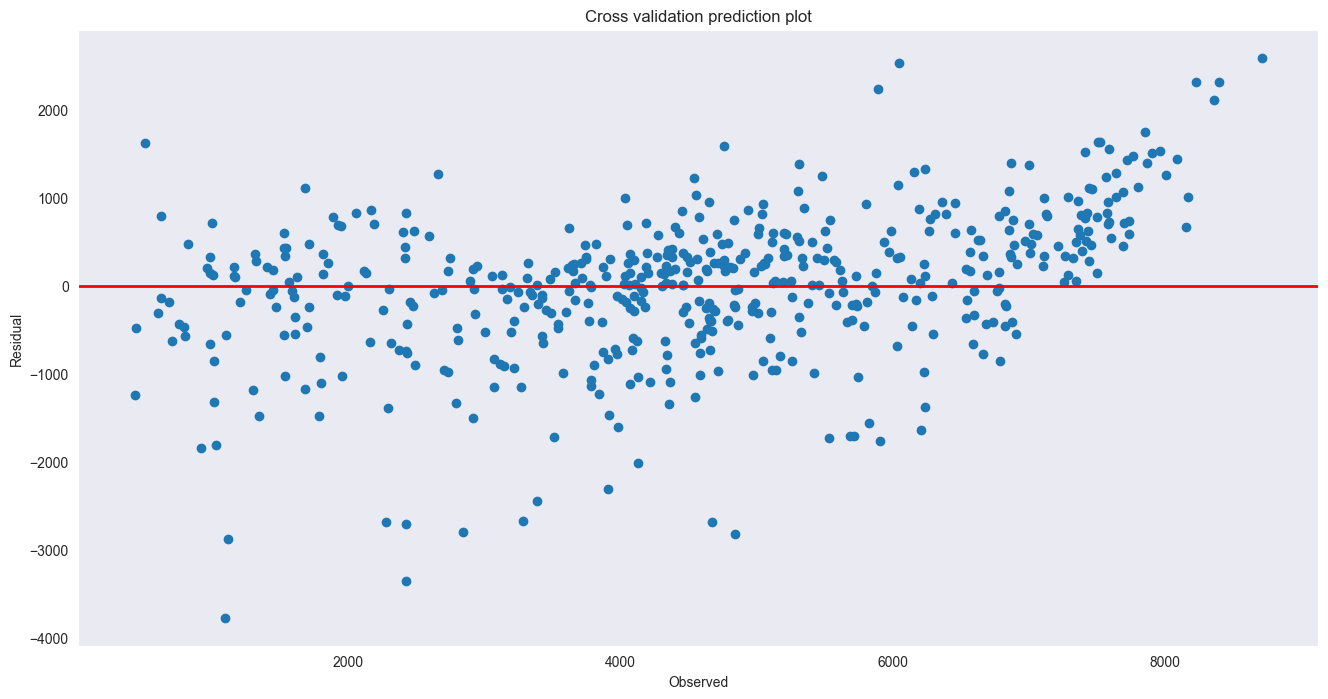

In [37]:
#Cross validation plot
fig,ax=plt.subplots(figsize=(16,8))
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='red')

plt.show()

Cross validation prediction plot tells about finite variance between actual target value and predicted target value. In this plot, some data points have same finite variance between them,  and some are not having it.

In [38]:
#R-squared scores
r2_scores = cross_val_score(lr_model, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.8113458473924906


The R-squared or coefficient of determination is 0.81 on average , it means that predictor is only able to predict 81% of the variance in the target variable which is contributed by independent variables.

In [39]:
#To get dummy variables to encode the categorical features to numeric
test_encoded_attributes=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of transformed dataframe :',test_encoded_attributes.shape)
test_encoded_attributes.head(5)

Shape of transformed dataframe : (219, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,4,6,50.2917,20.295000,12.791439,False,True,False,False,True,False,True,False,True,False,False,False,True
1,5,0,81.8750,27.367500,14.333846,False,True,False,False,True,False,True,False,True,False,False,True,False
2,10,0,62.3750,13.085847,11.833339,False,False,False,True,True,False,True,False,True,False,False,True,False
3,12,4,75.7500,17.356653,3.167425,True,False,False,False,True,False,False,True,False,True,False,True,False
4,5,4,49.2917,27.880000,13.083693,False,True,False,False,True,False,False,True,True,False,False,False,True


In [40]:
#Test dataset for prediction
X_test=test_encoded_attributes
y_test=y_test.total_count.values

In [41]:
#predict the model
lr_pred=lr_model.predict(X_test)
display(lr_pred)

array([6196.04661286, 4343.42428846, 3306.55061595, 1944.84985206,
       7110.96683875, 4669.77352708, 2098.22996151, 2570.11892772,
       3574.40348857, 3717.4014786 , 3014.66899407, 5045.86762577,
       1768.93908372, 3953.24671072, 5220.27615663, 3065.42472795,
       5776.45313988, 1325.95033476, 6088.43218144, 4294.11754971,
       3518.06685534, 4063.52153021, 4509.91665186, 5761.01268669,
       5233.52337804, 5208.93764229, 3727.80142777,  670.96798767,
       4939.9021794 , 1842.30786884, 3490.91253839, 3121.85019543,
       1204.59548476, 1226.01002727, 5425.0809158 , 5227.27610161,
       3221.1766013 , 3237.61334338,  815.60086314, 6746.23076099,
       1759.20738765, 5799.82964097, 5027.71078114, 6260.88717647,
       4740.34706134, 3447.80101989, 6296.38204948, 4985.5534277 ,
       4478.33471489, 6718.80789438, 3858.79799517, 4456.01833916,
       5853.88874918, 5474.62296493, 5491.10141876, 6916.25728827,
       3684.66222042, 6280.56707085, 4222.51238553, 5306.33393

In [44]:
# Model evaluation metrics
# Root mean square error and mean absolute error scores
import math
#Root mean square error 
rmse=math.sqrt(metrics.mean_squared_error(y_test,lr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,lr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 802.4291866599555
Mean absolute error : 595.2441391283483


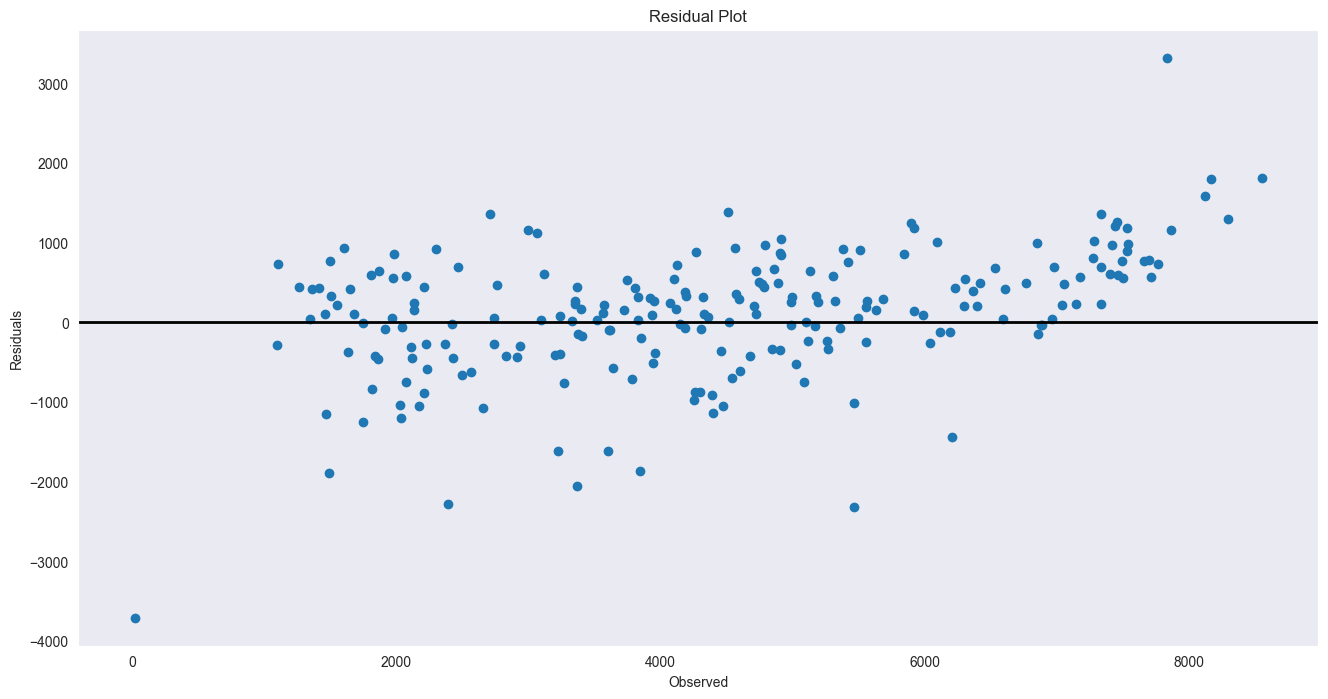

In [45]:
#Residual plot
fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
ax.scatter(y_test, y_test-lr_pred)
ax.axhline(lw=2,color='black')

plt.show()

Residual plot tells about finite variance between actual target value and predicted target value. In this plot,very less data points are having the same finite variance between them.

Observations and explanations:

1. There is an increase in the bike rental count in spring and summer season , and then decrease in the bike rental count in fall and winter season.
2. During no holidays, the bike rental counts is the highest, compared to during holidays for different seasons.
3. The bike rental count distribution is higher in 2019 than in 2018.
5. There is no significant change in bike demand with working days and non working days.
6. During clear, partly cloudy weather, the bike rental count is the highest, second-highest during misty cloudy weather, and followed by 3rd highest, during light snow and light rain weather.
7. Outlier analysis:<br>
    (i) No outliers are present in total_count variable.<br>
    (ii) No outliers are present in normalized temp but few outliers are present in normalized windspeed and humidity variables.
8. Normal probability plot is a graphical technique to identify substantive departures from normality and also it tells about goodness of fit. In our normal probability plot, some target variable data points are deviating from normality.
9. Correlation matrix tells about linear relationship between attributes and helps us to build better models. 
From our correlation plot, we can observe that some features are positively correlated and some are negatively correlated to each other. The temp and atemp are highly positively correlated to each other, it means that both are carrying same information.The total_count,casual and registered are highly positively correlated to each other. So, we have ignored atemp,casual and registered variable for further analysis.
10. For modelling the datset, we split the dataset into train and test in the ratio of 70:30.
11. Training dataset:<br>
    (i) While fitting Linear regression to our trained dataset, Accuracy of the model: 82.4 %<br>
    (ii) Cross validation prediction plot tells about finite variance between actual target value and predicted target value. In our Cross validation prediction plot for training dataset, some data points are have same finite variance between them and some are not having it.<br>
    (iii) Model Evaluation metrics: R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable.The R-squared or coefficient of determination for our model is 0.81 on average , it means that predictor is only able to predict 81% of the variance in the target variable which is contributed by independent variables.<br>
12. Testing dataset:<br>
    (i) Model Evaluation metrics: Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors), and The mean absolute error of a model with respect to a test set is the mean of the absolute values of the individual prediction errors on over all instances in the test set.<br>
        For our model, 
        Root mean square error : 802.4291866599553
        Mean absolute error : 595.2441391283483
13. Residual plot tells about finite variance between actual target value and predicted target values. In our Residual plot,very less data points are having the same finite variance between them.